# EJERCICIOS

In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization

## EJERCICIO 1

¿Cuántas neuronas hacen falta en la capa de salida para clasificar emails entre correo no deseado y correo deseado? 

¿Qué función de activación deberías usar en la capa de salida? 

Si, en cambio, quieres enfrentarte a MNIST, ¿cuántas neuronas necesitas en la capa de salida y qué función de activación deberías usar? 

¿Y si quieres que la red prediga los precios de la vivienda en California?

- Necesitaremos 1 neurona y utilizaremos la funcion de activacion Sigmoide que es la que se utiliza para clasificacion binaria.
- Para Mnist necesitaremos 10 neuronas de salida ya que queremos clasificar imagenes de digitos del 0 al 9 y utilizaremos de funcion de activacion softmax que convierte los valores de salida de las neuronas en probabilidades
- Para predecir el precio de las viviendas en california 

## EJERCICIO 2

Entrena un red neuronal profunda con el conjunto de datos MNIST (puedes cargarlo con tf. keras. datasets.minst.load_data()). Intenta conseguir la mejor pruebas en el conjunto de validación  ajustando los hiperparámetros de modo manual. Prueba a buscar una buena tasa de aprendizaje y utiliza la detención temprana (mínimo hay que conseguir un 97%).

Pasos a seguir: 
+ Entrena varios modelos con distintas tasas de aprendizaje
+ Guarda cada modelo en un fichero
+ Carga cada modelo y evalúalo en el conjunto de cargas y quedate con programación con el mejor (bucle que se quede con el mejor), mostrando la tasa de aprendizaje y la exactitud del mejor modelo.

Si no obtienes más de un 97% vuelve a empezar.

In [4]:
# Cargar datos de MNIST
data= tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = data

# Normalizar los datos (valores entre 0 y 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Dividir los datos de entrenamiento en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Crear una función para definir el modelo
def create_model(learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),  # Aplanar la imagen de 28x28 a un vector de 784
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),  # Capa de regularización con Dropout
        tf.keras.layers.Dense(10, activation='softmax')  # 10 clases para la salida
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Configuración para la detención temprana
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Diferentes tasas de aprendizaje a probar
learning_rates = [0.001, 0.01, 0.1, 0.0001]

best_model = None
best_accuracy = 0
best_lr = None

# Entrenar modelos con distintas tasas de aprendizaje
for lr in learning_rates:
    print(f"Entrenando modelo con tasa de aprendizaje: {lr}")
    
    # Crear el modelo
    model = create_model(lr)
    
    # Entrenar el modelo
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val),
                        callbacks=[early_stopping], batch_size=64, verbose=2)
    
    # Evaluar el modelo en el conjunto de validación
    val_accuracy = model.evaluate(x_val, y_val, verbose=0)[1]
    print(f"Exactitud en validación con tasa de aprendizaje {lr}: {val_accuracy}")
    
    # Guardar el modelo si es el mejor
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_lr = lr
        best_model = model
        model.save(f"best_model_lr_{lr}.h5")  # Guardar el mejor modelo

# Cargar el mejor modelo y evaluarlo en el conjunto de test
print(f"\nCargando el mejor modelo con tasa de aprendizaje {best_lr} y evaluando en el conjunto de test")
best_model = tf.keras.models.load_model(f"best_model_lr_{best_lr}.h5")
test_accuracy = best_model.evaluate(x_test, y_test)[1]
print(f"Exactitud en el conjunto de prueba: {test_accuracy}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Entrenando modelo con tasa de aprendizaje: 0.001


/home/iabd24/anaconda3/envs/Neuronales/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-01-07 18:31:31.455730: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
750/750 - 3s - 4ms/step - accuracy: 0.8931 - loss: 0.3733 - val_accuracy: 0.9441 - val_loss: 0.1919
Epoch 2/10
750/750 - 2s - 2ms/step - accuracy: 0.9479 - loss: 0.1797 - val_accuracy: 0.9621 - val_loss: 0.1341
Epoch 3/10
750/750 - 2s - 2ms/step - accuracy: 0.9605 - loss: 0.1343 - val_accuracy: 0.9683 - val_loss: 0.1082
Epoch 4/10
750/750 - 2s - 2ms/step - accuracy: 0.9668 - loss: 0.1106 - val_accuracy: 0.9709 - val_loss: 0.0960
Epoch 5/10
750/750 - 2s - 2ms/step - accuracy: 0.9722 - loss: 0.0926 - val_accuracy: 0.9738 - val_loss: 0.0881
Epoch 6/10
750/750 - 2s - 2ms/step - accuracy: 0.9761 - loss: 0.0818 - val_accuracy: 0.9734 - val_loss: 0.0850
Epoch 7/10
750/750 - 2s - 2ms/step - accuracy: 0.9784 - loss: 0.0694 - val_accuracy: 0.9762 - val_loss: 0.0820
Epoch 8/10
750/750 - 2s - 2ms/step - accuracy: 0.9799 - loss: 0.0647 - val_accuracy: 0.9765 - val_loss: 0.0799
Epoch 9/10
750/750 - 2s - 2ms/step - accuracy: 0.9826 - loss: 0.0555 - val_accuracy: 0.9772 - val_loss: 0.0770
E

Exactitud en validación con tasa de aprendizaje 0.001: 0.9788333177566528
Entrenando modelo con tasa de aprendizaje: 0.01
Epoch 1/10
750/750 - 3s - 3ms/step - accuracy: 0.9084 - loss: 0.2984 - val_accuracy: 0.9523 - val_loss: 0.1611
Epoch 2/10
750/750 - 2s - 3ms/step - accuracy: 0.9403 - loss: 0.1992 - val_accuracy: 0.9603 - val_loss: 0.1469
Epoch 3/10
750/750 - 2s - 3ms/step - accuracy: 0.9471 - loss: 0.1804 - val_accuracy: 0.9580 - val_loss: 0.1696
Epoch 4/10
750/750 - 2s - 2ms/step - accuracy: 0.9501 - loss: 0.1740 - val_accuracy: 0.9596 - val_loss: 0.1487
Epoch 5/10
750/750 - 2s - 2ms/step - accuracy: 0.9530 - loss: 0.1604 - val_accuracy: 0.9608 - val_loss: 0.1535
Epoch 6/10
750/750 - 2s - 2ms/step - accuracy: 0.9571 - loss: 0.1496 - val_accuracy: 0.9632 - val_loss: 0.1572
Epoch 7/10
750/750 - 2s - 2ms/step - accuracy: 0.9593 - loss: 0.1464 - val_accuracy: 0.9645 - val_loss: 0.1562
Epoch 8/10
750/750 - 2s - 2ms/step - accuracy: 0.9614 - loss: 0.1360 - val_accuracy: 0.9632 - val_los

Exactitud en validación con tasa de aprendizaje 0.0001: 0.952750027179718

Cargando el mejor modelo con tasa de aprendizaje 0.001 y evaluando en el conjunto de test
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9753 - loss: 0.0839
Exactitud en el conjunto de prueba: 0.9776999950408936


## EJERCICIO 3

Clasificación de Imágenes de Dígitos Escritos a Mano:

* Objetivo: Entrenar una red neuronal para clasificar imágenes de dígitos escritos a mano utilizando el conjunto de datos SVHN (Street View House Numbers).

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos representando alguna imagen con su etiqueta y muestra los valores (únicos) de y (en el entrenamiento, en validación y en pruebas), preparar los datos (d normalizar dividiendo entre 255.0 e igual hay que hacer algo más), construir, compilar y entrenar una red neuronal. 

    * Utilizar detección temprana

    * Hacer una gráfica de como evoluciona accuracy y val_accuracy durante el entrenamiento

    * Si es necesario ajustar el modelo para lograr una mayor precisión.

    * Evalúar el modelo en el conjunto de test y hacer alguna predicción (representa alguna imagen con su etiqueta real y la predicha)

In [5]:
def load_svhn_data(url):
    path = tf.keras.utils.get_file("svhn.mat", url)
    data = loadmat(path)
    return np.transpose(data["X"], (3, 0, 1, 2)), data["y"].flatten()

# Cargar datos
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"
X_train_full, y_train_full = load_svhn_data(train_url)
X_test, y_test = load_svhn_data(test_url)

# Cargar datos
X_train_full, y_train_full = load_svhn_data(train_url)
X_test, y_test = load_svhn_data(test_url)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

# Normalizar los datos
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

182040794/182040794 ━━━━━━━━━━━━━━━━━━━━ 49s 0us/step


Etiquetas únicas en entrenamiento: [0 1 2 3 4 5 6 7 8 9]
Etiquetas únicas en validación: [0 1 2 3 4 5 6 7 8 9]
Etiquetas únicas en prueba: [0 1 2 3 4 5 6 7 8 9]


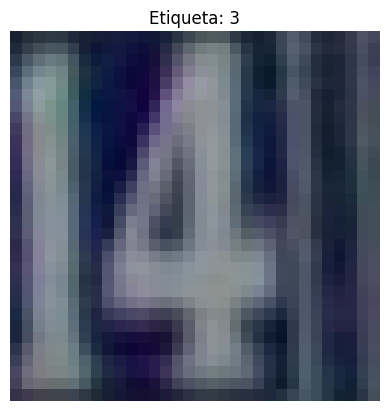

2025-01-07 18:46:36.389374: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 810160128 exceeds 10% of free system memory.


Epoch 1/10
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.5811 - loss: 1.2860 - val_accuracy: 0.8559 - val_loss: 0.5142
Epoch 2/10
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.8600 - loss: 0.4927 - val_accuracy: 0.8701 - val_loss: 0.4424
Epoch 3/10
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.8828 - loss: 0.4010 - val_accuracy: 0.8830 - val_loss: 0.3962
Epoch 4/10
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.8994 - loss: 0.3434 - val_accuracy: 0.8897 - val_loss: 0.3814
Epoch 5/10
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.9132 - loss: 0.2949 - val_accuracy: 0.8997 - val_loss: 0.3517
Epoch 6/10
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9199 - loss: 0.2716 - val_accuracy: 0.8937 - val_loss: 0.3667
Epoch 7/10
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9291 - loss: 0.2459 - val_accuracy: 0.8963 - val_loss: 0.3771
Epoch 8/10
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9372 -

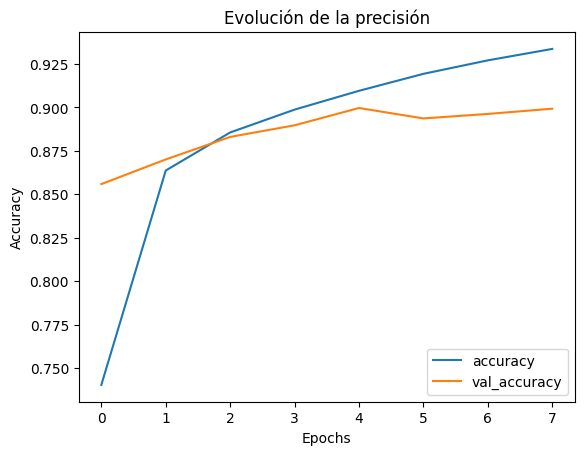

  15/2290 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9321 - loss: 0.2422

2025-01-07 18:51:10.678218: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 900182016 exceeds 10% of free system memory.


2290/2290 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9259 - loss: 0.2656
Precisión en el conjunto de prueba: 92.45%
  29/2290 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step 

2025-01-07 18:51:21.379454: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 900182016 exceeds 10% of free system memory.


2290/2290 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


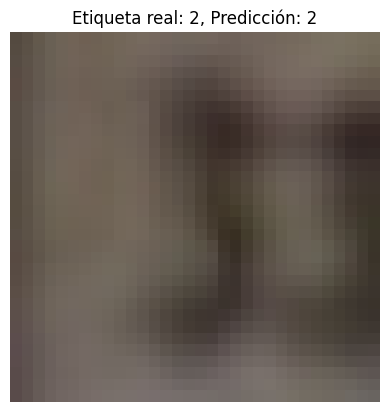

In [9]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Cargar datos de SVHN
def load_svhn_data(url):
    path = tf.keras.utils.get_file("svhn.mat", url)
    data = loadmat(path)
    return np.transpose(data["X"], (3, 0, 1, 2)), data["y"].flatten()

# URLs de los conjuntos de datos
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"

# Cargar datos
X_train_full, y_train_full = load_svhn_data(train_url)
X_test, y_test = load_svhn_data(test_url)

# Ajustar las etiquetas (restar 1 para que estén en el rango [0, 9])
y_train_full = y_train_full - 1
y_test = y_test - 1

# Dividir en datos de entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

# Normalizar los datos
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

# Verificar etiquetas únicas en cada conjunto de datos
print("Etiquetas únicas en entrenamiento:", np.unique(y_train))
print("Etiquetas únicas en validación:", np.unique(y_valid))
print("Etiquetas únicas en prueba:", np.unique(y_test))

# Mostrar una imagen de ejemplo
plt.imshow(X_train[0])
plt.title(f"Etiqueta: {y_train[0]}")
plt.axis('off')
plt.show()

# Construcción del modelo
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 clases (dígitos 0-9)
])

# Compilación del modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Detección temprana
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

# Graficar la evolución de la precisión
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Evolución de la precisión')
plt.legend(loc='lower right')
plt.show()

# Evaluación en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")

# Predicciones
predictions = model.predict(X_test)

# Mostrar imagen con etiqueta real y predicha
idx = 10  # Puedes cambiar el índice
plt.imshow(X_test[idx])
plt.title(f"Etiqueta real: {y_test[idx]}, Predicción: {np.argmax(predictions[idx])}")
plt.axis('off')
plt.show()


## EJERCICIO 4

Predicción del consumo de energía:

* Objetivo: Construir una red neuronal para predecir el consumo de energía de edificios a partir de características como la temperatura, humedad, y tiempo del conjunto de datos Energy Efficiency de UCI Machine Learning Repository

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos, preparar los datos (normalizar con una capa de normalización), construir un modelo de regresión, compilar y entrenar una red neuronal. 
    
    * Usa X1-X8 para la X e Y1-Y2 para la y

    * Ajusta el modelo hasta encontrar un error absoluto medio aceptable

    * Haz una gráfica de como evoluciona el error absoluto medio y error absoluto medio del conjunto de validación durante el entrenamiento

    * Evalúa el modelo en el conjunto de test y haz alguna predicción (muestra el valor predicho y el real)

In [14]:
# Descargar el conjunto de datos de eficiencia energética de UCI
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data = pd.read_excel(url)

In [15]:
# Dividir los datos en X (características) y Y (objetivos)
X = data.iloc[:, :-2].values  # X1-X8 (columnas de características)
Y = data.iloc[:, -2:].values  # Y1-Y2 (columnas objetivo)

# Dividir los datos en conjunto de entrenamiento, validación y prueba
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Normalizar los datos
normalizer = Normalization()
normalizer.adapt(X_train)  # Calculamos estadísticas de la normalización sobre X_train

# Crear un modelo secuencial
model = Sequential([
    normalizer,
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(2)  # Salida de 2 valores: Y1 y Y2
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Ver el resumen del modelo
model.summary()


/home/iabd24/anaconda3/envs/Neuronales/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (460, 8)               │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9255 - mae: 1.7732 - val_loss: 6.7359 - val_mae: 1.8648
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1279 - mae: 1.8772 - val_loss: 7.2154 - val_mae: 1.9237
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.0140 - mae: 1.7979 - val_loss: 6.6376 - val_mae: 1.8565
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8214 - mae: 1.7925 - val_loss: 6.8980 - val_mae: 1.8650
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.3118 - mae: 1.8190 - val_loss: 6.4853 - val_mae: 1.8022
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9975 - mae: 1.9325 - val_loss: 6.7017 - val_mae: 1.8172
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6697 - mae: 1.6911 - val_loss: 6.4342 - val_mae: 1.8013
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7614 - mae: 1.7873 - val_loss: 6.4862 - val_mae: 1.7910
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.0865 - mae: 

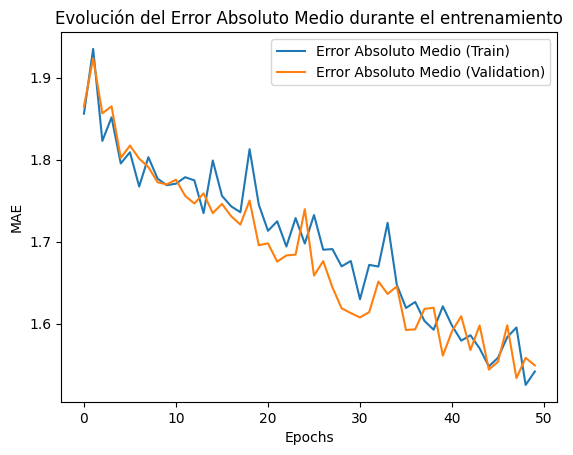

In [19]:
# Entrenar el modelo
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, 
                    validation_data=(X_valid, Y_valid))

# Graficar la evolución del error absoluto medio durante el entrenamiento
plt.plot(history.history['mae'], label='Error Absoluto Medio (Train)')
plt.plot(history.history['val_mae'], label='Error Absoluto Medio (Validation)')
plt.title('Evolución del Error Absoluto Medio durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [20]:
# Evaluar el modelo en el conjunto de test
test_loss, test_mae = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

# Realizar predicciones
predictions = model.predict(X_test)

# Mostrar algunas predicciones comparadas con los valores reales
for i in range(5):
    print(f"Predicción: {predictions[i]}, Real: {Y_test[i]}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0167 - mae: 1.9248  
Test Loss: 5.870486736297607
Test MAE: 1.7228456735610962
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Predicción: [13.877244 15.55467 ], Real: [14.66 15.64]
Predicción: [28.622347 31.276968], Real: [28.07 34.14]
Predicción: [30.666212 32.95307 ], Real: [24.6  29.31]
Predicción: [14.296806 17.157206], Real: [14.37 16.54]
Predicción: [32.935028 35.967316], Real: [35.89 43.3 ]
